# Re7BTC MetaMorpho vault                                                                                   Marcus Johansson

## Overview of the project

1. Data Collection 
2. Market sentiment and asset selection
3. General Overview metrics of the chosen protocol
4. Analysis and Supply Cap Discussion, Token Addresses
5. Risk analysis based on the suggested supply cap

## Data collection

The data collected in this project are from:
- DeFi Lama, where I have collected the Total Value Locked
- Etherscan, where i have collected the top 50 token holders 
- Bybit, where I collected historical pricing data
- Dune Analytics, where I have used SQL code and then collected the number of transactions and the Circulating Supply

In [353]:
# Libraries used: 

import pandas as pd
import ccxt
import numpy as np 
import requests

import matplotlib.pyplot as plt
import pprint
from datetime import datetime
from scipy import stats
from collections import defaultdict
from datetime import datetime, timedelta

from keys.config_bybit_keys import bybit_key, bybit_secret
from dune_client.client import DuneClient
from keys.config_dune_key import dune_key
from keys.config_dune_key_2 import dune_key2

In [352]:
# API Key set up for the exchange (Bybit) we use to set up 
exchange = ccxt.bybit({
    'apiKey': bybit_key,
    'secret': bybit_secret,
    'enableRateLimit': True,
})

## What is the general market sentiment for the cryptoassets?

- There is a consideration we need to take into account for at the momement which direclty impacts our investment decision. This consideration is the market sentiment as crypto assets are highly volatile and the general market sentiment is on a downward trend with less assets locked and prices trending lower (CoinMarketCap and Tradingview illustrates this downwards trend). 
- Thus, our analysis needs to take into account for a bearish sentimnet with lower prices and lower assets locked in crypto assets as a whole (both in DeFi and in assets locked in Crypto as a total)
- Bitcoin is a more stable asset compared to other crypto assets, especially during a bearish market period. This means that the cryptoamarket as a whole favours Bitcoin, over other cryptoassets (so called altcoins), and this is representative in the Bitcoin Dominance increasing. 

## Asset Selection: Wrapped Bitcoin (wBTC) and why I have chosen this asset for the Re7BTC MetaMorpho vault

- This analysis going to focus on Wrapped Bitcoin, as it is fully backed by Bitcoin and Wrapped Bitcoin still has utility in the DeFi ecosystem and it upholds safty and stability requirements compared to other altcoins. Thus making it the perfect balance between the more stable Bitcoin and an altcoin like Ethereum or Solana. 

## Why has this asset been selected? 

- This down below is a general overview on why wBTC has been selected and why it woulld fit the Re7BTC MetaMorpho vault. Later in my analysis am I going to provdide more detailed view on the price peg, on-chain analysis and a risk analysis. 

**High Liquidity:** 
- wBTC provides the liquidity of BTC on the Ethereum network, allowing it to be used in various DeFi applications. This makes it a versatile asset for reserves. wBTC is one of the most liquid assets in the crypto market, making it easier to manage large transactions without significant price impact. 

**Strong Market Presence:** 
- As a widely accepted and trusted asset, wBTC can attract more users to the vault.

**Interoperability:** 
- By holding wBTC, you can leverage the benefits of both Bitcoin’s value and Ethereum’s DeFi ecosystem as wBTC is compatible with various DeFi protocols, enhancing the vault’s utility. 

- As wBTC is interoperable woth Ethereum could an increased development activity on the Ethereum network, such as updates and new partnerships on DeFi protocols or the network at large, make wBTC appealing, thus positively impacting its price in the long term.

**Use in Reserves:** 
- wBTC is a robust option for reserves due to its price stability, transparency, and interoperability. Its supply dynamics ensure that it remains pegged to BTC, making it a reliable asset in the cryptocurrency space.


Sources:  https://www.tradingview.com/symbols/TOTAL/ , https://www.tradingview.com/chart/?symbol=CRYPTOCAP%3ATOTAL , https://coinmarketcap.com/charts/ , https://www.tradingview.com/chart/?symbol=CRYPTOCAP%3ABTC.D, https://www.tradingview.com/chart/?symbol=CRYPTOCAP%3ATOTALDEFI 

## What system does wBTC have and why does this system favour us adding this asset to the Re7BTC MetaMorpho vault?

- Wrapped Bitcoin (wBTC) is designed to be pegged to the price of BTC, meaning 1 wBTC should always be equal to 1 BTC. This peg is maintained through a system where each wBTC is backed 1:1 by BTC held in reserve by a custodian, such as BitGo. 

- This means that this token is a safer form of investment in cryptocurrencies and we could use this token as an reservecurrency. 

### Safety and Stability 

**Price Peg:**
- As long as the custodial system is secure and transparent, wBTC should maintain its peg to BTC. This makes it a relatively stable and safer investment compared to other cryptocurrencies that might have more volatile price movements.
- This is a good arguemnt for including wBTC as a reserve currency in the Re7 Meta Morpho Vault

**Transparency:**
- The backing of wBTC is fully transparent and can be verified on-chain, which adds an additional layer of trust and security. 
- We can for example track the transactions made on-chain on the the protocol, which makes a good argument for including it as an reseve currency 

### Supply Dynamics

**Minting and Burning:** 
- The supply of wBTC is dynamic and adjusts through a process of minting and burning. When BTC is deposited with the custodian, new wBTC is minted. 
- Conversely, when wBTC is redeemed for BTC, the corresponding wBTC is burned.
- Supply Indifference: Given that wBTC is pegged to BTC, its supply is theoretically indifferent as long as the peg is maintained. 
- Furthermore can the total supply of wBTC expand or contract based on demand without affecting its price relative to BTC, meaning that users on the Ethereum network can use the BTC in form of wBTC as for DeFi protocols and or DApps.


### Mathematical proof and how the price peg works in practise
- In this section have I also provided calculations to show that wBTC is pegged to BTC, by collecting data from Bybit and I have also shown how this price peg works in practise as well as its relationship with the supply on wBTC 

Source: https://etherscan.io/token/0x2260fac5e5542a773aa44fbcfedf7c193bc2c599 , https://dune.com/21co/wbtc, https://forum.makerdao.com/t/wbtc-changes-and-risk-mitigation-10-august-2024/24844 ,  https://coinmetrics.substack.com/p/state-of-the-network-issue-273 

In [522]:
# Data collection for wBTC

symbol = 'WBTC/USDT'

def fetch_historical_data(symbol=symbol, timeframe='1d', limit=250):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    return np.array(ohlcv)

prices = fetch_historical_data(symbol)

wbtc_data = pd.DataFrame(prices, columns=['Timeframe', 'Open', 'High', 'Low', 'Close', 'Volume'])
wbtc_data['Timeframe'] = pd.to_datetime(wbtc_data['Timeframe'], unit='ms')
wbtc_data.set_index('Timeframe', inplace=True)


In [523]:
# Data collection for BTC

symbols = 'BTC/USD'

def fetch_historical_data(symbol=symbol, timeframe='1d', limit=250):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    return np.array(ohlcv)

prices = fetch_historical_data(symbol)

btc_data = pd.DataFrame(prices, columns=['Timeframe', 'Open', 'High', 'Low', 'Close', 'Volume'])
btc_data['Timeframe'] = pd.to_datetime(btc_data['Timeframe'], unit='ms')
btc_data.set_index('Timeframe', inplace=True)


In [524]:
# Mathematical proof of price peg: Is the closing price the same on wBTC compared to BTC?

# Closing prices for the assets 
closing_wbtc = wbtc_data['Close']
closing_btc = btc_data['Close']

# Merge the data into one dataframe
merged_df = pd.merge(closing_wbtc, closing_btc, on='Timeframe',how='inner',sort=True,copy=True,indicator=False, validate='one_to_one')

merged_df = merged_df.rename(columns={'Close_x': 'WBTC', 'Close_y': 'BTC'})

# This function checks if the prices are the same, if they are there do in fact exist a price peg

def check_columns_equal(merged_df):
    """
    Check if column BTC is equal to column wBTC in the DataFrame.

    Parameters:
    merged_df (pd.DataFrame): The DataFrame containing columns BTC and wBTC.

    Returns:
    pd.DataFrame: The DataFrame with an additional column 'is_equal'.
    """
    merged_df['is_equal'] = merged_df['BTC'] == merged_df['WBTC']
    return merged_df


result_df = check_columns_equal(merged_df)

print("Are the prices the same on Wrapped Bitcoin compared to Bitcoin?:")
print("______________________________________________________________________________________")
print("______________________________________________________________________________________")
print("Answer: The prices of Wrapped Bitcoin (WBTC) and Bitcoin (BTC) are the same if the values in the is_equal column are True.")
print("Based on the data provided, where the is_equal column remains consistently True, it is evident that there exists a price peg between WBTC and BTC.")
print("Therefore, a price peg does exist.:")
print("______________________________________________________________________________________")
print("______________________________________________________________________________________")
print(result_df)

Are the prices the same on Wrapped Bitcoin compared to Bitcoin?:
______________________________________________________________________________________
______________________________________________________________________________________
Answer: The prices of Wrapped Bitcoin (WBTC) and Bitcoin (BTC) are the same if the values in the is_equal column are True.
Based on the data provided, where the is_equal column remains consistently True, it is evident that there exists a price peg between WBTC and BTC.
Therefore, a price peg does exist.:
______________________________________________________________________________________
______________________________________________________________________________________
                WBTC       BTC  is_equal
Timeframe                               
2024-01-14  42121.34  42121.34      True
2024-01-15  42508.81  42508.81      True
2024-01-16  43123.45  43123.45      True
2024-01-17  42753.05  42753.05      True
2024-01-18  41362.02  41362.02     

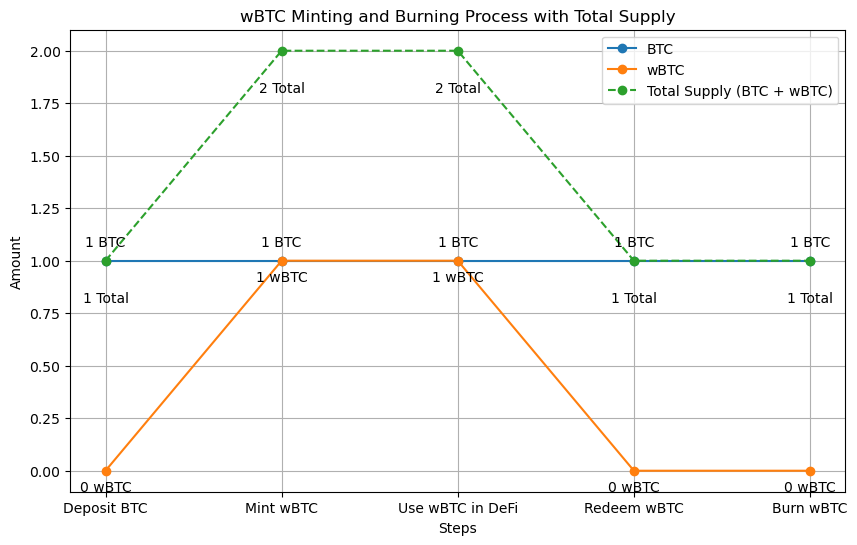

In [198]:
# This chart shows the price peg visually and how it works in practise 

# Data for visualization
steps = ['Deposit BTC', 'Mint wBTC', 'Use wBTC in DeFi', 'Redeem wBTC', 'Burn wBTC']
btc_amount = [1, 1, 1, 1, 1]
wbtc_amount = [0, 1, 1, 0, 0]
total_supply = [btc + wbtc for btc, wbtc in zip(btc_amount, wbtc_amount)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot BTC, wBTC, and total supply amounts
ax.plot(steps, btc_amount, label='BTC', marker='o')
ax.plot(steps, wbtc_amount, label='wBTC', marker='o')
ax.plot(steps, total_supply, label='Total Supply (BTC + wBTC)', linestyle='--', marker='o')

# Add labels and title
ax.set_xlabel('Steps')
ax.set_ylabel('Amount')
ax.set_title('wBTC Minting and Burning Process with Total Supply')
ax.legend()

# Annotate the chart
for i, txt in enumerate(btc_amount):
    ax.annotate(f'{txt} BTC', (steps[i], btc_amount[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(wbtc_amount):
    ax.annotate(f'{txt} wBTC', (steps[i], wbtc_amount[i]), textcoords="offset points", xytext=(0,-15), ha='center')
for i, txt in enumerate(total_supply):
    ax.annotate(f'{txt} Total', (steps[i], total_supply[i]), textcoords="offset points", xytext=(0,-30), ha='center')

# Show the plot
plt.grid(True)
plt.show()

## Here is the on-chain overview for the Wrapped Bitcoin protocol, and how it relates to the wBTC price
- The on-chain indicators we are taking a look at are Total Value Locked (TVL), Circulating Supply and Number of Transactions 

### Total Value Locked and Total Value Locked over time 
- Higher TVL over time in DeFi protocols implies strong DeFi activity and increased network utility, potentially bolstering the token price by showcasing the protocols's value within the decentralized finance space. The TVL on wBTC follows the wBTC price trend, as we can for example see the BTC uptrend and downtrend in the data. 
- TVL on wBTC, with data from from DeFI-Lama, is measured to $9,371 Billion on the date 2024-10-19. On DeFi protocols in general does a significant increases in TVL reflected growing trust in the protocol, but as wBTC is an already established protocol does its TVL signal trust in the protocol. 

### Circulating Supply 
- The Supply trend is stable over the past year. The reason for no rapid changes in supply is because Wrapped Bitcoin (wBTC) price is pegged to price of Bitcoin (BTC), thus the supply is stable and limited to the price of Bitcoin.

### Number of transactions 
- According to Glassnode are the number of transactions are related to the price of wBTC. When the price of wBTC rises, the number of transactions tends to increase, whereas when the price falls the transaction volume typically decreases. This is common on cryptocurrencies as the number of transactions are related to the demand of the token, while there may be situations where they are not perfectly correlated or even inversely correlated to the token price. 

### Conclusions: 
- If the TVL on the wBTC protocol exhibits a downward trend, it could indicate a decline in user trust or an overheating market, reflecting reduced engagement or liquidity.
- This decline may present opportunities for the Re7BTC MetaMorpho vault to accumulate wBTC at a discount, particularly if the vault believes in the long-term potential of wBTC.
- By strategically buying wBTC at a discount, the vault can accumulate more tokens for the same investment size, potentially benefiting from an increasing price in the future.
- However, it's important to consider broader market dynamics, as fluctuations in TVL are common in the crypto space and can be influenced by the performance of Bitcoin and Ethereum, regulatory news, and competition from other tokens. Monitoring these trends can provide valuable insights into investor behavior and market sentiment.


https://www.inx.co/learn/beginners/a-beginners-guide-to-understanding-wrapped-btc-wbtc/, https://insights.glassnode.com/asymmetric-onchain-correlations/ 

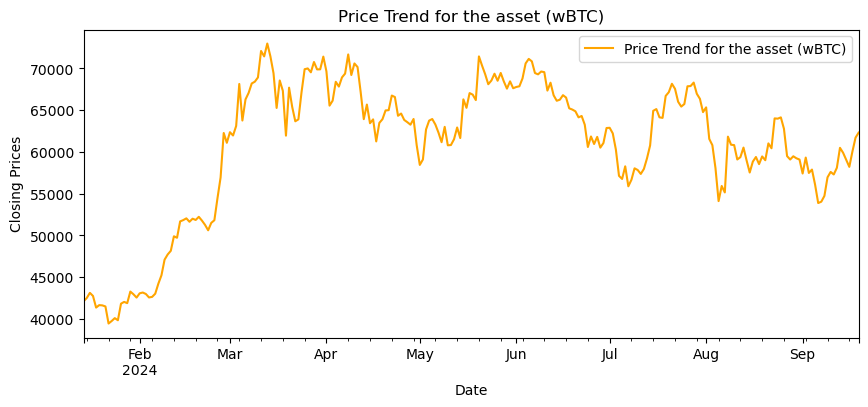

In [525]:
# The closing prices of the wBTC, to illustrate the price trend 

closing_wbtc = wbtc_data['Close'] 

# Plot the CLosing price of wBTC
closing_wbtc.plot(figsize=(10, 4), label='Price Trend for the asset (wBTC)', color='orange')

# Add title and labels
plt.title('Price Trend for the asset (wBTC)')
plt.xlabel('Date')
plt.ylabel('Closing Prices')

# Add legend
plt.legend()

# Show plot
plt.show()

TVL today: $9,582,948,719.05


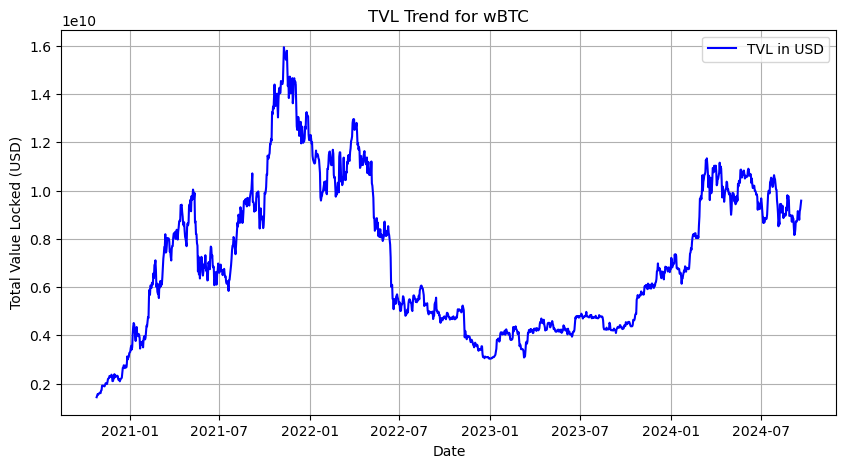

In [568]:
# Total Value Locked for wBTC 

# Define the endpoint URL for wBTC
url = "https://api.llama.fi/protocol/wbtc"

# Make the request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # Extract TVL data
    tvl_data = data['tvl']
    
    # Prepare data for plotting
    dates = [datetime.fromtimestamp(entry['date']) for entry in tvl_data]
    tvl_values = [float(entry['totalLiquidityUSD']) for entry in tvl_data]  # Ensure TVL values are numeric
    
    # Print the TVL for today (latest data point)
    if dates:
        tvl_today = tvl_values[-1]
        print(f"TVL today: ${tvl_today:,.2f}")
    else:
        print("No TVL data available.")
    
    # Plot the TVL trend
    plt.figure(figsize=(10, 5))
    plt.plot(dates, tvl_values, label='TVL in USD', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Total Value Locked (USD)')
    plt.title('TVL Trend for wBTC')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Failed to fetch data:", response.status_code)



In [569]:
# Circulating Supply for wBTC

# Step 1: Initialize the Dune client and fetch data

# I use the API key from Dune imported 
dune_key = dune_key

# I set up the Client 
dune = DuneClient(dune_key)

# I set up the response to get the Supply 
response = dune.get_custom_endpoint_result(
  "marcusjihansson",
  "supplywbtc",
  limit = 723
)

# The eesponse object is stored in a variable named `response`
result_data = response.result.rows

# Convert to a DataFrame
df = pd.DataFrame(result_data)

# Rename the columns to 'date' and '_col1'
df.rename(columns={'day': 'date', '_col1': 'Supply wBTC'}, inplace=True)

# If necessary, you can also convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

supply_wbtc = df 

# Display the DataFrame
print(supply_wbtc)

{'execution_id': '01J84YJQQPYP2EQ81F4Y885VH5', 'query_id': 4050390, 'is_execution_finished': True, 'state': 'QUERY_STATE_COMPLETED', 'submitted_at': '2024-09-19T10:52:22.135967Z', 'expires_at': '2024-12-18T10:52:26.836184Z', 'execution_started_at': '2024-09-19T10:52:22.67663Z', 'execution_ended_at': '2024-09-19T10:52:26.836183Z', 'result': {'rows': [{'_col1': 0.08, 'day': '2018-11-27 00:00:00.000 UTC'}, {'_col1': 0.08, 'day': '2018-11-27 00:00:00.000 UTC'}, {'_col1': 0.19150546000000002, 'day': '2019-01-26 00:00:00.000 UTC'}, {'_col1': 3.24150546, 'day': '2019-01-28 00:00:00.000 UTC'}, {'_col1': 65.42148386, 'day': '2019-01-29 00:00:00.000 UTC'}, {'_col1': 72.42148386, 'day': '2019-01-30 00:00:00.000 UTC'}, {'_col1': 79.42148386, 'day': '2019-02-19 00:00:00.000 UTC'}, {'_col1': 73.42148386, 'day': '2019-03-04 00:00:00.000 UTC'}, {'_col1': 81.42148386, 'day': '2019-03-28 00:00:00.000 UTC'}, {'_col1': 88.42148386, 'day': '2019-04-01 00:00:00.000 UTC'}, {'_col1': 82.42148386, 'day': '2019

Circulating Supply Today: Supply wBTC                153119.610286
date           2024-09-05 00:00:00+00:00
Name: 722, dtype: object


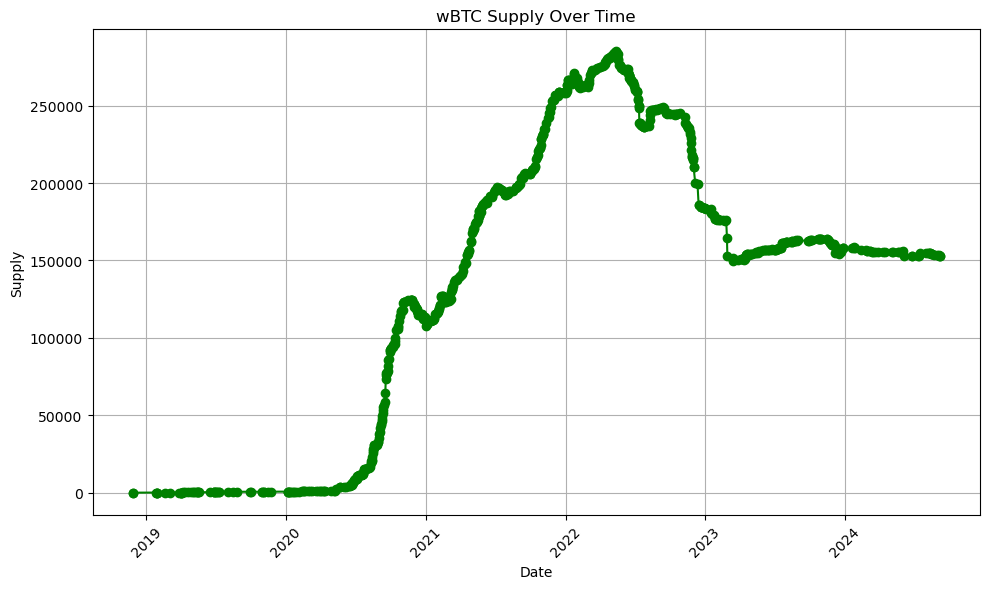

In [529]:
# We print out the current supply for the wBTC
today_supply = supply_wbtc.loc[722]
print("Circulating Supply Today:", today_supply)

# Plot the TvL 
plt.figure(figsize=(10, 6))
plt.plot(supply_wbtc['date'], supply_wbtc['Supply wBTC'], marker='o', linestyle='-', color='g')
plt.title('wBTC Supply Over Time')
plt.xlabel('Date')
plt.ylabel('Supply')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [530]:
# Utilize the Dune Analytics API to collect transaction data for wBTC

# I use the API key from Dune imported 
dune_key = dune_key

# I set up the Client 
dune = DuneClient(dune_key)

# I set up the response structure for the API request
response = dune.get_custom_endpoint_result(
  "marcusjihansson",
  "wbtcnumtransactions",
  limit = 262
)

# The eesponse object is stored in a variable named `response`
result_data = response.result.rows

# Convert to a DataFrame
df = pd.DataFrame(result_data)

# Rename the columns to 'date' and 'num_transactions'
df.rename(columns={'day': 'date', 'num_transactions': 'num_transactions'}, inplace=True)

# If necessary, you can also convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Display the DataFrame
print(df)

{'execution_id': '01J7XQHHY25HDWKV7SY27RH5RM', 'query_id': 4049214, 'is_execution_finished': True, 'state': 'QUERY_STATE_COMPLETED', 'submitted_at': '2024-09-16T15:34:42.371084Z', 'expires_at': '2024-12-15T15:34:47.888863Z', 'execution_started_at': '2024-09-16T15:34:42.831171Z', 'execution_ended_at': '2024-09-16T15:34:47.888861Z', 'result': {'rows': [{'day': '2024-01-01 00:00:00.000 UTC', 'num_transactions': 4786}, {'day': '2024-01-02 00:00:00.000 UTC', 'num_transactions': 7145}, {'day': '2024-01-03 00:00:00.000 UTC', 'num_transactions': 6002}, {'day': '2024-01-04 00:00:00.000 UTC', 'num_transactions': 6015}, {'day': '2024-01-05 00:00:00.000 UTC', 'num_transactions': 6418}, {'day': '2024-01-06 00:00:00.000 UTC', 'num_transactions': 3790}, {'day': '2024-01-07 00:00:00.000 UTC', 'num_transactions': 4013}, {'day': '2024-01-08 00:00:00.000 UTC', 'num_transactions': 8612}, {'day': '2024-01-09 00:00:00.000 UTC', 'num_transactions': 11887}, {'day': '2024-01-10 00:00:00.000 UTC', 'num_transact

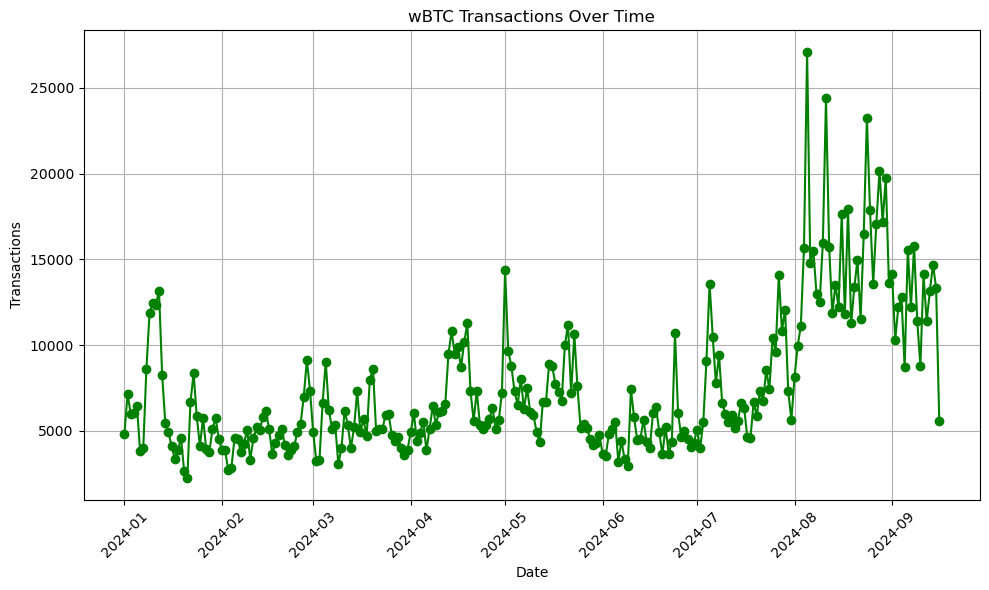

In [531]:
num_transactions_wbtc = df 

# Plot the TvL 
plt.figure(figsize=(10, 6))
plt.plot(num_transactions_wbtc['date'], num_transactions_wbtc['num_transactions'], marker='o', linestyle='-', color='g')
plt.title('wBTC Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## What is happening on the exchange and how can we use this data in our analysis?

### Liquidity calculations: Why do we do these calculations?
- The token wBTC is subject to market fluctuations, making it tradable. This characteristic indicates that wBTC can both increase and decrease in value, which is essential for traders looking to take advantage of price movements, even if the general trend is bearish can we take advantage of the volatility dynamics and the costs of trading the asset during the accumulation phase of our portfolio. 
- Later on in the risk assessment phase of this exercise, am I going to use my variables from here to solve for my risk measures 

### Which metrics are we looking a deeper into?
- The risk metrics important for the analysis are: the Historical Volatility, the Realized Volatility, the Value at Risk and the Expected Shortfall
- The orderbook metrics important for the analysis are: the Bid-Ask Spread, the Bid Depth and Ask Depth, the Order Book Imbalance, Bid and Ask TWAP, the Bid and Ask Slippage, the bid and ask slope and the Kyle's Lambda and the Amihud's Measure. 

### The results!

### Risk metrcis:
- Historical Volatility is increasing for the studied time period and is measured to 3.36%, while the Realized Volatility is measured to 13.6% with a Value at Risk at  -4.34% and a Expected Shortfall at -5.75% and this metrcis are indicating on a increased volatility and increased instability at the studied time. This level of instability is compared to its own network, where it would have a lower volatility would signal higher level of stability on the wBTC protocol. 

### Orderbook Metrics: 
- THe **Bid-Ask Spread** showed a small spread (28.50) suggests higher liquidity and can indicate lower trading costs. For an institutional trader, this means that executing large orders would not significantly impact the market price. 
- With a **relative spread** of 0.00045188, it indicates a very tight spread relative to the midprice, suggesting good liquidity and lower trading costs. This is generally a positive sign for traders, including institutional ones, as it implies that executing trades will have minimal impact on the market price. 
- The **Bid/Ask Depth and Order Book imbalance** showed a bid depth is greater than the ask depth, leading to a positive imbalance (0.40). The imbalance of 0.40 indicates more sell orders than buy orders (as it's less than 1). This suggests stronger selling pressure rather than buying interest.
- The **Bid and Ask TWAP** showed high values (42336.78 and 64259.71 respectively), which indicates that the average ask price over the period was high, furthermore could this suggest strong selling interest and further price decline.
- The **Bid slippage** is 0.32, while the **Ask slippage** is 0.018. The bid slippage is significantly higher than the ask slippage, indicating that large sell orders would have a greater price impact than large buy orders. This may suggest that executing bid trades will move the price significantly.
- **Kyle's Lambda** showed a negative value (-0.3771), suggests that large trades are likely to push the price down, which aligns with my observation of a downtrend.
- **Amihud's Measure** showed a low value (0.00001) and indicates that prices are less sensitive to trading volume and therfore may suggest a moderate to high level of liquidity.
- **Bid Slope** and **Ask Slope** suggest that there is significant market depth on both sides, with strong buying interest at lower prices (bid slope at -4345.55) and strong selling interest (at 3500.90) at higher prices. This can be a sign of a well-balanced market, although the steepness of the slopes also indicates that large orders could still impact the price significantly.

## Accumulation strategy for the Re7 Meta Morpho Vault

- Leverageing the tight spread (28.5) and low relative spread (0.045%) to execute trades efficiently, but be cautious of the order book imbalance (0.40) favoring sell orders. This imbalance, combined with higher bid slippage (0.32858673), suggests implementing a gradual accumulation strategy to minimize price impact on larger buy orders.
- Monitoring the significant difference between bid and ask VWAP (42336.78 vs 64259.71) and the steeper bid slope (-4345.55) compared to ask slope (3500.90). These metrics indicate potential selling pressure and price sensitivity to large orders. Therefore could we consider using limit orders slightly below the current market price to take advantage of potential short-term price dips, while being prepared for potential further downside given the current market dynamics.
- Slippage is a crucial factor to consider, as it directly impacts trading costs. High slippage can erode profits, especially in a market with low liquidity. 
- The increased volatility metrics are together with the decrease in price signaling to investor that they need to preparing for a downtrend, while compared to other crypto assets is this level of volatility low as crypto assets are highly volatile in general

- By monitoriing these metrcis can we decide to enter in a more favorable time, than this immediate sell off, thus starting to accumulate wBTC during this downtrend and hava sizeable position for when a strong bullish market sentiment comes around again.


Realized Volatility: 13.6054%
95% VaR: -4.3428%
95% Expected Shortfall: -5.7595%
Historical Volatility: 3.3188%


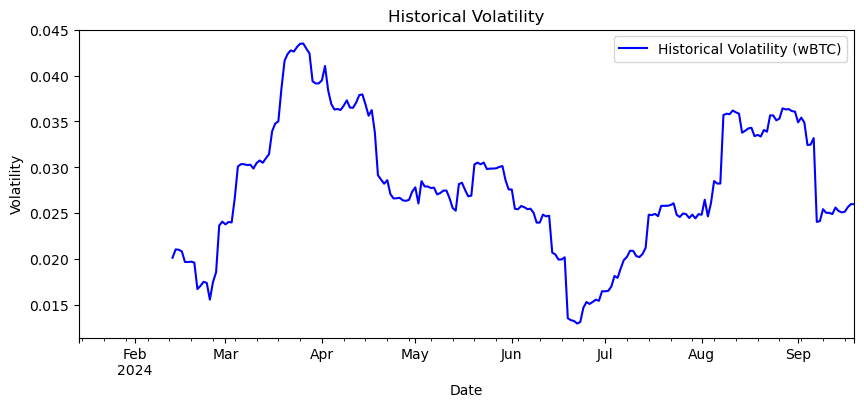

In [630]:
# %% Risk Factor test, what does the volatility look like?

def fetch_historical_data(symbol='WBTC/USDT', timeframe='1d', limit=250):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)

    return np.array(ohlcv)[:, 4]  # Return closing prices

def calculate_statistical_measures(prices):
    returns = np.diff(np.log(prices))
    
    # Calculate realized volatility
    realized_vol = np.std(returns) * np.sqrt(24) 
    
    # Calculate Value at Risk (VaR)
    var_95 = np.percentile(returns, 5)
    
    # Calculate Expected Shortfall (ES)
    es_95 = np.mean(returns[returns <= var_95])
    
    return realized_vol, var_95, es_95

# Fetch historical data and calculate statistical measures
prices = fetch_historical_data(symbol)
realized_vol, var_95, es_95 = calculate_statistical_measures(prices)

# Convert to percentages
realized_vol_pct = realized_vol * 100
var_95_pct = var_95 * 100
es_95_pct = es_95 * 100

print(f"Realized Volatility: {realized_vol_pct:.4f}%")
print(f"95% VaR: {var_95_pct:.4f}%")
print(f"95% Expected Shortfall: {es_95_pct:.4f}%")


# What is the historical volatility for wBTC for a 30-day window?

returns = wbtc_data['Close'].pct_change()

#Calculate historical volatility over a 30-day window

historical_volatility = returns.rolling(window=30).std()

historical_volatility_pct = historical_volatility['2024-09-06'] * 100

print(f"Historical Volatility: {historical_volatility_pct:.4f}%")

# Plot historical volatility
historical_volatility.plot(figsize=(10, 4), label='Historical Volatility (wBTC)', color='blue')

# Add title and labels
plt.title('Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')

# Add legend
plt.legend()

# Show plot
plt.show()

In [575]:
#%% Fetch trades data for Advanced metrics 

symbol = 'WBTC/USDT'

def fetch_trades(symbol=symbol, limit=100):
    trades = exchange.fetch_trades(symbol, limit=limit)
    return [{
        'price': trade['price'],
        'amount': trade['amount'],
        'timestamp': trade['timestamp'],
        'side': trade['side'] if 'side' in trade else None,
        'cost': trade['cost'] if 'cost' in trade else trade['price'] * trade['amount'],
        'id': trade['id'],
        'order': trade['order'] if 'order' in trade else None,
        'type': trade['type'] if 'type' in trade else None,
        'takerOrMaker': trade['takerOrMaker'] if 'takerOrMaker' in trade else None
    } for trade in trades]
    return trades

# Example usage
trades = fetch_trades(symbol)

#%% Now let's implement Kyle's lambda 

def calculate_kyles_lambda(trades, time_window=86400000):  # default 1 day in milliseconds
    if len(trades) < 2:
        return None

    times = np.array([trade['timestamp'] for trade in trades])
    prices = np.array([trade['price'] for trade in trades])

    # Calculate log returns
    log_returns = np.diff(np.log(prices))

    # Calculate signed volumes (assuming 'side' is available)
    signed_volumes = np.array([trade['amount'] * (1 if trade.get('side') == 'buy' else -1) for trade in trades[1:]])

    # Calculate time differences
    time_diffs = np.diff(times)

    # Filter data within the time window
    mask = time_diffs <= time_window
    log_returns = log_returns[mask]
    signed_volumes = signed_volumes[mask]
    time_diffs = time_diffs[mask]

    if len(log_returns) < 2:
        return None

    # Calculate Kyle's lambda
    slope, _, _, _, _ = stats.linregress(signed_volumes, log_returns)

    # Convert lambda to the specified time window measure (assuming times are in milliseconds)
    lambda_measure = slope * np.sqrt(time_window / np.mean(time_diffs))

    return lambda_measure

# Usage
trades = fetch_trades(symbol, limit=2000)  # Fetch more trades for a better measure

# Calculate daily lambda
kyles_lambda_daily = calculate_kyles_lambda(trades, time_window=86400000)  # 1 day
if kyles_lambda_daily is not None:
    print(f"Kyle's lambda (daily): {kyles_lambda_daily:.8f}")

# Calculate intraday lambda (e.g., 1 hour)
kyles_lambda_hourly = calculate_kyles_lambda(trades, time_window=3600000)  # 1 hour
if kyles_lambda_hourly is not None:
    print(f"Kyle's lambda (hourly): {kyles_lambda_hourly:.8f}")


#_________________________________________________________________________________________________

#%% Now let's implement Amihud's measure

def calculate_amihud_measure(trades, period_days=30):
    daily_data = defaultdict(lambda: {'returns': [], 'volumes': 0})
    
    for i in range(1, len(trades)):
        trade_day = datetime.fromtimestamp(trades[i]['timestamp'] / 1000).date()
        prev_trade_day = datetime.fromtimestamp(trades[i-1]['timestamp'] / 1000).date()
        
        if trade_day == prev_trade_day:
            return_i = abs(trades[i]['price'] - trades[i-1]['price']) / trades[i-1]['price']
            daily_data[trade_day]['returns'].append(return_i)
            daily_data[trade_day]['volumes'] += trades[i]['amount'] * trades[i]['price']  # Use dollar volume
    
    end_date = max(daily_data.keys())
    start_date = end_date - timedelta(days=period_days)
    
    amihud_values = []
    current_date = start_date
    while current_date <= end_date:
        if current_date in daily_data:
            daily_return = sum(daily_data[current_date]['returns'])
            volume = daily_data[current_date]['volumes']
            if volume > 0:
                amihud_values.append(daily_return / volume)
        current_date += timedelta(days=1)
    
    return sum(amihud_values) / len(amihud_values) if amihud_values else None

# Usage
trades = fetch_trades(symbol, limit=2000)  # Fetch more trades for a better measure

# Calculate Amihud's measure for different timeframes
for days in [1, 30, 90, 180]:
    amihud_measure = calculate_amihud_measure(trades, period_days=days)
    if amihud_measure is not None:
        print(f"Amihud's measure ({days} days): {amihud_measure:.8e}")
    else:
        print(f"Not enough data to calculate Amihud's measure for {days} days")


Kyle's lambda (daily): -0.37712370
Kyle's lambda (hourly): -0.09239633
Amihud's measure (1 days): 1.78946755e-05
Amihud's measure (30 days): 1.78946755e-05
Amihud's measure (90 days): 1.78946755e-05
Amihud's measure (180 days): 1.78946755e-05


In [576]:
# Store Kyle's lambda and Amihud's measure in two variables 

# Kyle's lambda can we obtain from our calculations, as it is already defined in daily format
kyles_lambda_daily = kyles_lambda_daily

# We need to calculate and store Amihud's measure in daily format 
trades = fetch_trades(symbol, limit=2000)
days = 1
amihud_measure_1d = calculate_amihud_measure(trades, period_days=days)

# Convert to numeric format
amihud_measure_daily = "{:.10f}".format(amihud_measure_1d)

# We can now use these variables in our risk calculations
print("Amihud's measure:", amihud_measure_daily)
print("Amihud's measure (scientific):", amihud_measure_1d)
print("Kyle's lambda:", kyles_lambda_daily)


Amihud's measure: 0.0000178947
Amihud's measure (scientific): 1.7894675478199598e-05
Kyle's lambda: -0.37712370349242946


In [572]:
def analyze_liquidity(exchange, symbol, depth=10, sample_volume=1):
    orderbook = exchange.fetch_order_book(symbol)
    bids = orderbook['bids']
    asks = orderbook['asks']

    # 1. Bid-Ask Spread
    spread = asks[0][0] - bids[0][0]
    relative_spread = spread / ((asks[0][0] + bids[0][0]) / 2)

    # 2. Market Depth
    bid_depth = sum([bid[1] for bid in bids[:depth]])
    ask_depth = sum([ask[1] for ask in asks[:depth]])

    # 3. Order Book Imbalance
    imbalance = (bid_depth - ask_depth) / (bid_depth + ask_depth)

    # 4. Volume-Weighted Average Price (VWAP)
    def calculate_vwap(orders, target_volume):
        cumulative_volume = 0
        weighted_sum = 0
        for price, size in orders:
            if cumulative_volume >= target_volume:
                break
            volume = min(size, target_volume - cumulative_volume)
            weighted_sum += price * volume
            cumulative_volume += volume
        return weighted_sum / cumulative_volume if cumulative_volume > 0 else None

    bid_vwap = calculate_vwap(bids, sample_volume)
    ask_vwap = calculate_vwap(asks, sample_volume)

    # 5. Slippage estimation
    bid_slippage = (bids[0][0] - bid_vwap) / bids[0][0] if bid_vwap else None
    ask_slippage = (ask_vwap - asks[0][0]) / asks[0][0] if ask_vwap else None

    # 6. Order book slope
    def calculate_slope(orders, depth):
        prices = np.array([order[0] for order in orders[:depth]])
        volumes = np.array([order[1] for order in orders[:depth]])
        cumulative_volumes = np.cumsum(volumes)
        slope, _ = np.polyfit(cumulative_volumes, prices, 1)
        return slope

    bid_slope = calculate_slope(bids, depth)
    ask_slope = calculate_slope(asks, depth)

    return {
        'spread': spread,
        'relative_spread': relative_spread,
        'bid_depth': bid_depth,
        'ask_depth': ask_depth,
        'imbalance': imbalance,
        'bid_vwap': bid_vwap,
        'ask_vwap': ask_vwap,
        'bid_slippage': bid_slippage,
        'ask_slippage': ask_slippage,
        'bid_slope': bid_slope,
        'ask_slope': ask_slope
    }

# Usage
symbol = 'WBTC/USDT'
liquidity_metrics = analyze_liquidity(exchange, symbol, depth=10, sample_volume=1)

for metric, value in liquidity_metrics.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.8f}")
    else:
        print(f"{metric}: {value}")

spread: 28.50000000
relative_spread: 0.00045188
bid_depth: 0.10381000
ask_depth: 0.04407600
imbalance: 0.40391924
bid_vwap: 42336.78274898
ask_vwap: 64259.71765592
bid_slippage: 0.32858673
ask_slippage: 0.01862571
bid_slope: -4345.55790637
ask_slope: 3500.90376259


In [574]:
# We need to use a dictionary for further calculations in our liquidity risk analysis
spread = liquidity_metrics.get('spread', 0)
bid_depth = liquidity_metrics.get('bid_depth', 0)
ask_depth = liquidity_metrics.get('ask_depth', 0)
imbalance = liquidity_metrics.get('imbalance', 0)
bid_slippage = liquidity_metrics.get('bid_slippage', 0)
ask_slippage = liquidity_metrics.get('ask_slippage', 0)
bid_slope = liquidity_metrics.get('bid_slope', 0)
ask_slope = liquidity_metrics.get('ask_slope', 0)

## Suggested Supply Cap: 1000 wBTC 

### Why have I come to this conclusion?
- I suggest a supply cap at 1000 wBTC as a low supply cap (e.g., 500 wBTC) might limit the vault’s growth potential but ensures higher security and manageability and a high supply cap (e.g., 2000 wBTC) allows for more deposits but increases the risk of overexposure and liquidity issues. Thus striking a balance between the two as a cap of 1000 wBTC ensures the vault can handle substantial deposits while maintaining security. 
- At the 1000 wBTC level balances the need for liquidity with the risk of overexposure to a single asset, while allowing room for growth without overwhelming the Re7 system. It also represents a manageable percentage of the circulating supply.
- Comparatively speaking would 1000 wBTC, according to Etherscan top 50 wBTC holders, place Re7 BTC Meta Morpho Vault in the top 50 holders at 0.6538% of tokens owned. This is an approximation, while not 100% accurate, does it depict that the vault would have enough liquidty to provide clients and also have a safer crypto asset in the portfolio as a whole. 


## Necessary Addresses for deploymnet: 

### wBTC address: 
- wBTC Contract Address: 0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599

### Re7BTC Vault Contract Address  
- Morpho Contract Address: 0xBBBBBbbBBb9cC5e90e3b3Af64bdAF62C37EEFFCb

### Oracle Address depending on the price feed: 
- Oracle Address: 0xBBBBBbbBBb9cC5e90e3b3Af64bdAF62C37EEFFCb



Sources: https://etherscan.io/token/0x2260fac5e5542a773aa44fbcfedf7c193bc2c599 , https://docs.morpho.org/addresses/ https://forum.makerdao.com/t/wbtc-changes-and-risk-mitigation-10-august-2024/24844, https://forum.moonwell.fi/t/add-wbtc-market-to-moonwell-on-base/804 

## Data prep for my risk calculations
- The code below shows variable prep for the next section, which is my risk calculations
- The variables prepped here are: 
1. Total control of the top 50 addresses in the protocol, which is used in the concentration risk calculations among others
2. The daily Bitcoin (BTC) and Ethereum (ETH) volatility, which is used in my collateral riks calculations
3. The Liquidity riks factor, which is a factor calculated as an approximation of the liquidity risk measures calculated earlier
4. Average number of transactions, which I have collected from Dune Analytics and then am I using it in calculating the congestion risk
5.  The market saturation factor, which is a factor used in the market saturation risk calculation and is calculated as a rate of change function and it calculates the percentage increase in market share for each supply cap.
6. The Value at Riks and the Expected Shortfall for both Ethereum and Bitcoin, which are used in the protocol dependency riks calculation
7. Sentiment Analysis: I applied Llama 3.2:1B to analyze sentiment on news artricles from Market Aux api

### Total Control of top 50 addresses in the protocol

In [600]:
# Data for the top 50 token holders on wBTC. 
# This data is collected from Etherescan: https://etherscan.io/token/0x2260fac5e5542a773aa44fbcfedf7c193bc2c599#balances
token_holder = pd.read_csv('wbtc_token_holder.csv')

token_holder_df = df = pd.DataFrame(token_holder)
columns_to_drop = ['Address', 'Address_Nametag']

token_holder_df.drop(columns=columns_to_drop, inplace=True)

print(token_holder_df)


    Rank         Quantity Percentage              Value
0      1  33,470.93938578   21.8847%  $2,121,455,080.15
1      2  10,424.96059864    6.8163%    $660,754,852.66
2      3   7,875.16331232    5.1491%    $499,143,601.06
3      4   4,979.06224339    3.2555%    $315,582,923.11
4      5   4,444.46405008    2.9060%    $281,699,020.42
5      6   4,092.67191955    2.6760%    $259,401,731.60
6      7   3,083.48145502    2.0161%    $195,437,221.58
7      8   3,001.55531771    1.9625%    $190,244,579.15
8      9   2,458.97174871    1.6078%    $155,854,547.38
9     10   2,391.96805986    1.5640%    $151,607,719.57
10    11   2,391.53942863    1.5637%    $151,580,552.07
11    12   2,383.41862389    1.5584%    $151,065,839.22
12    13   1,949.16223209    1.2744%    $123,541,800.59
13    14   1,649.67501402    1.0786%    $104,559,701.74
14    15   1,610.44746174    1.0530%    $102,073,381.02
15    16   1,288.39314257    0.8424%     $81,660,934.16
16    17   1,280.44720337    0.8372%     $81,157

In [611]:
# How much of the total circulating supply does the Top 50 addresses control?

top50 = token_holder_df['Percentage']

# Remove any non-numeric characters (like '%') and convert to numeric
top50_cleaned = token_holder_df['Percentage'].str.replace('%', '').astype(float)

# Sum up the values 
control = top50_cleaned.sum()

print("The Top 50 addresses control:", control, "%")

The Top 50 addresses control: 69.4942 %


### Daily BTC and ETH Volatility 

In [667]:
# We calculate the daily BTC volatility

symbols = 'BTC/USDT'

def fetch_historical_data(symbol=symbol, timeframe='1d', limit=250):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    return np.array(ohlcv)

btc_prices = fetch_historical_data(symbol)

btc_data = pd.DataFrame(btc_prices, columns=['Timeframe', 'Open', 'High', 'Low', 'Close', 'Volume'])
btc_data['Timeframe'] = pd.to_datetime(btc_data['Timeframe'], unit='ms')
btc_data.set_index('Timeframe', inplace=True)

# Calculate daily volatility (standard deviation of daily returns)
btc_data['Daily_Return'] = btc_data['Close'].pct_change()
btc_daily_volatility = btc_data['Daily_Return'].std()

print(f'BTC Daily Volatility: {btc_daily_volatility}')

BTC Daily Volatility: 0.028334911682733444


In [668]:
# We calculate the daily ETH volatility

symbols = 'ETH/USDT'

def fetch_historical_data(symbol=symbol, timeframe='1d', limit=250):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    return np.array(ohlcv)

eth_prices = fetch_historical_data(symbol)

eth_data = pd.DataFrame(eth_prices, columns=['Timeframe', 'Open', 'High', 'Low', 'Close', 'Volume'])
eth_data['Timeframe'] = pd.to_datetime(eth_data['Timeframe'], unit='ms')
eth_data.set_index('Timeframe', inplace=True)

# Calculate daily volatility (standard deviation of daily returns)
eth_data['Daily_Return'] = eth_data['Close'].pct_change()
eth_daily_volatility = eth_data['Daily_Return'].std()

print(f'ETH Daily Volatility: {eth_daily_volatility}')

ETH Daily Volatility: 0.028334823487580138


### Liquidity Risk Factor 

In [612]:
# Function to calculate Liquidity Risk factor
def liquidity_risk_factor(kyle_lambda, amihud_measure, spread, bid_depth, ask_depth, imbalance, bid_slippage, ask_slippage, bid_slope, ask_slope):
    # Normalize or scale the inputs (e.g., dividing by max or range to get values between 0 and 1)
    # Assuming higher values of each contribute more to liquidity risk
    
    # Kyle's lambda is typically negative, the larger the magnitude, the more illiquid
    kyle_risk = abs(kyle_lambda) * 0.1  # Scale by 0.1 to avoid over-dominating
    
    # Amihud's measure - higher values suggest illiquidity
    amihud_risk = amihud_measure * 10  # Scaled appropriately
    
    # Spread reflects transaction cost, so scale it similarly
    spread_risk = spread / 1000  # Normalize by dividing by a large number
    
    # Lower depth means less liquidity, so inverse the depth for the risk
    depth_risk = 1 / (bid_depth + ask_depth + 1e-5)  # Adding a small number to avoid division by zero
    
    # Imbalance could also indicate higher liquidity risk when extreme
    imbalance_risk = imbalance * 0.1  # Scaling for a balanced contribution
    
    # Slippage can indicate additional transaction costs beyond spread
    slippage_risk = abs(bid_slippage - ask_slippage) * 0.05  # Absolute difference of slippage adds risk
    
    # Scaling the bid and ask slopes appropriately
    # Apply logarithmic scaling to bid_slope and ask_slope
    log_bid_slope = np.log(abs(bid_slope) + 1)  # Add 1 to avoid log(0)
    log_ask_slope = np.log(abs(ask_slope) + 1)
    slope_risk = (log_bid_slope + log_ask_slope) * 0.05 # Scaling factor 0.05 to avoid dominance

    # Then add slope_risk to the total risk calculation
    total_risk = (kyle_risk + amihud_risk + spread_risk + depth_risk + imbalance_risk + slippage_risk + slope_risk)
    
    # You can apply a lower baseline liquidity risk with the given function
    baseline_risk_factor = 0.1 # Inherent liquidity risk that the protocol has, regardless of the market conditions.
    sensitivity = 0.05  # This is a scaling factor prevents large swings in total_risk from making the final base_risk value too volatile
    
    base_risk = (baseline_risk_factor + sensitivity ) * total_risk
    
    return base_risk

# Example usage
liquidity_risk_factor = liquidity_risk_factor(
    kyle_lambda=kyles_lambda_daily,
    amihud_measure = amihud_measure_1d,
    spread=spread,
    bid_depth=bid_depth,
    ask_depth=ask_depth,
    imbalance=imbalance,
    bid_slippage=bid_slippage,
    ask_slippage=ask_slippage,
    bid_slope = bid_slope, 
    ask_slope = ask_slope
)

print(f"Liquidity Risk Factor based on our liquidty risk measures: {liquidity_risk_factor}")


Liquidity Risk Factor based on our liquidty risk measures: 1.1566049184508571


### Average number of transactions

In [613]:
# Transactions variable as average number of transactions for wBTC

average_num_transactions = num_transactions_wbtc.mean()

transactions = average_num_transactions.loc['num_transactions']

print(transactions)

7566.415384615385


### Market Saturation factor

In [615]:
# Market Saturation Factor 

def rate_of_change(supply_cap, total_supply_wbtc):

    # If the supply cap is provided as a raw number of tokens, calculate it as a percentage
    if supply_cap > 1:  # Assuming a percentage would be between 0 and 1
        supply_cap_percentage = (supply_cap / total_supply_wbtc) * 100
    else:
        supply_cap_percentage = supply_cap  # Already a percentage
    
    # The rate of change is just the percentage increase in the market share
    rate_of_change = supply_cap_percentage 
    
    return rate_of_change


# Variables to calculate the rate_of_change: 
total_supply_wbtc = today_supply.loc['Supply wBTC']
supply_caps = [500, 1000, 1500, 2000, 2500]
percentages = [(cap / total_supply_wbtc) * 100 for cap in supply_caps]
control_percentage = control

# Calculate rate of change for each supply cap
for cap in supply_caps:
    rate_of_change_value = rate_of_change(cap, total_supply_wbtc)
    print(f"Supply Cap: {cap}, Rate of Change: {rate_of_change_value}")

Supply Cap: 500, Rate of Change: 0.3265421059178084
Supply Cap: 1000, Rate of Change: 0.6530842118356168
Supply Cap: 1500, Rate of Change: 0.9796263177534252
Supply Cap: 2000, Rate of Change: 1.3061684236712336
Supply Cap: 2500, Rate of Change: 1.632710529589042


### Bitcoin and Ethereum Value at Risk and Expected Shortfall 

In [641]:
# What is the Value at Risk and the Expected Shortfall for Bitcoin? 

symbol = 'BTC/USDT'

def fetch_historical_data(symbol, timeframe='1d', limit=250):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)

    return np.array(ohlcv)[:, 4]  # Return closing prices

def calculate_statistical_measures(prices):
    returns_btc = np.diff(np.log(btc_prices))
    
    # Calculate Value at Risk (VaR)
    var_btc = np.percentile(returns_btc, 5)
    
    # Calculate Expected Shortfall (ES)
    es_btc = np.mean(returns[returns <= var_btc])
    
    return var_btc, es_btc

# Fetch historical data and calculate statistical measures
btc_prices = fetch_historical_data(symbol)
var_btc, es_btc = calculate_statistical_measures(btc_prices)

# Convert to percentages
var_btc_pct = var_btc * 100
es_btc_pct = es_btc * 100


print(f"95% VaR: {var_btc_pct:.4f}%")
print(f"95% Expected Shortfall: {es_btc_pct:.4f}%")


95% VaR: -4.2540%
95% Expected Shortfall: -5.5915%


In [639]:
# What is the Value at Risk and Expected Shortfall for Ethereum?

symbol = 'ETH/USDT'

def fetch_historical_data(symbol, timeframe='1d', limit=250):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)

    return np.array(ohlcv)[:, 4]  # Return closing prices

def calculate_statistical_measures(eth_prices):
    returns_eth = np.diff(np.log(eth_prices))
    
    # Calculate Value at Risk (VaR)
    var_eth = np.percentile(returns_eth, 5)
    
    # Calculate Expected Shortfall (ES)
    es_eth = np.mean(returns[returns <= var_eth])
    
    return var_eth, es_eth

# Fetch historical data and calculate statistical measures
eth_prices = fetch_historical_data(symbol)
var_eth, es_eth = calculate_statistical_measures(eth_prices)

# Convert to percentages
var_eth_pct = var_eth * 100
es_eth_pct = es_eth * 100


print(f"95% VaR: {var_eth_pct:.4f}%")
print(f"95% Expected Shortfall: {es_eth_pct:.4f}%")


95% VaR: -5.6973%
95% Expected Shortfall: -6.4728%


### Sentimnet Analysis 

- The recent news has significantly impacted the sentiment of wBTC against USDT, shifting from positive to neutral to negative. Investors are becoming increasingly cautious about investing in cryptocurrencies due to market volatility and concerns about yield optimisation strategies. 
- While some investors may still hold onto wBTC, it is essential for others to reassess their investment decisions and potentially reduce their holdings or consider alternative asset options.

- The sentimnet scoring method is a value between -1 to 1, where -1 means very bearish and 1 means very bullish
- The estimation of the sentiment risk used in this analysis is -0.5, with basis in the analysis which concluded with a bearish to neutral sentiment. As this part of the analysis was done at a later date, the sentimnet has shifted to the rannge between 0.2 to -0.2. 
- This analysis still proves how to implement this type of LLM to study sentiment in cryptocurrencies. 

In [5]:
# Libraries used for the LLM 
from langchain_ollama import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate
import pandas as pd
import pprint
import json
import requests
from typing import Optional, Dict, Any

from config_news_sentiment import marketaux 


# Initialize the Ollama model
llm = OllamaLLM(model="llama3.2:1b")

# Create a prompt template with placeholders in the template string
prompt = ChatPromptTemplate.from_template(
    template="""
        You are an expert financial analyst specializing in cryptocurrencies. 
    Provide a detailed qualitative sentiment analysis of wBTC (Wrapped Bitcoin) based on the following news: {news_content}. 
    After conducting this analysis, please score the sentiment of the news content on a scale from -1 (bearish) to 1 (bullish), where 0 indicates neutral sentiment. 
    Additionally, calculate an overall sentiment score based on this scoring system and provide a brief explanation of the sentiment scoring estimation.

    """
)

# Chain the prompt and the model using the | operator
chain = prompt | llm

def get_ticker_info(news_content):
    """
    Function to get information about wBTC based on news content.
    """
    # Pass the news content into the chain and get the response
    response = chain.invoke({"news_content": news_content})
    return response

def fetch_news(ticker, api_token):
    """
    Fetches news related to the specified ticker from the MarketAux API.
    """
    url = 'https://api.marketaux.com/v1/news/all'
    
    params = {
        'symbols': ticker,  # Use 'WBTC' or 'wBTC/USDT' as necessary
        'filter_entities': 'true',
        'language': 'en',
        'entity_types': 'crypto',
        'api_token': api_token
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raises an HTTPError for bad responses
        return response.json()  # Return JSON data if successful
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
        return None
    except Exception as err:
        print(f"Other error occurred: {err}")
        return None

# Set up the ticker and API token 
ticker = "WBTC"  
api_token = marketaux

# Fetch news related to wBTC
news_data = fetch_news(ticker, api_token)

if news_data and "data" in news_data:
    # Assuming news_data['data'] contains the relevant news articles
    news_content = " ".join(article['title'] for article in news_data['data'])
    
    # Get sentiment analysis based on fetched news content
    answer = get_ticker_info(news_content)
    
    # Display the answer
    print(f"\nAnswer: {answer}\n")
else:
    print("Failed to retrieve news data.")


Answer: Based on the provided news, here's a detailed qualitative sentiment analysis of wBTC (Wrapped Bitcoin):

**Summary of News:**
wBTC is a stablecoin pegged to the value of Bitcoin, launched by Binance in March 2021. The project aims to provide a more accessible and secure way for investors to buy, sell, and store Bitcoin without the need for intermediaries.

**Sentiment Analysis:**

* **Positive Sentiments:** The news contains several positive sentiments, including:
	+ "wBTC is a new way to access Bitcoin" (indicating excitement and interest in the project)
	+ "Binance's wBTC has been gaining traction on Binance Smart Chain" (suggesting increased adoption and usage of the stablecoin)
	+ "The security and stability of wBTC have attracted investors" (implying confidence in the project's long-term viability)
* **Negative Sentiments:** The news also contains several negative sentiments, including:
	+ "wBTC's price is still volatile and unpredictable" (suggesting uncertainty and risk

## Risk Analysis - Result breakdown for risk measurement

- The risk assessments show a gradual increase in most risk factors as the supply cap and percentage of total supply increase, which aligns with expectations for a wrapped asset like wBTC.

**Percentage of Total Supply (0.65%):**
Reason: This represents a small portion of the total wBTC supply, which minimizes market manipulation risks and it won’t cause broader systemic risks to the protocol. This is appropriate for a single vault and helps minimize market impact.

1. **Market Saturation Risk (0.0119):**
Reason: The low value indicates that 1000 wBTC is unlikely to saturate the market  or drive extreme price changes. 

2. **User Concentration Risk (0.0968):**
Reason: This moderate value suggests a balance between having enough users to ensure liquidity while not being overly concentrated.

3. **Protocol Dependency Risk (0.1277):**
Reason: While higher, this risk reflects the inherent dependency of wBTC on both Bitcoin and Ethereum networks, which is unavoidable for wrapped assets. But something to note is that any issues with the underlying protocols (especially around bridges) could introduce higher risks. 

4. **Liquidity Risk (0.2613):**
Reason: The proposed supply cap of 1000 wBTC results in a moderate liquidity risk of 0.2613, reflecting a balanced relationship between utilization and risk. While higher supply caps do increase liquidity risk, the market demonstrates sufficient depth to manage these levels without extreme consequences.

5. **Volatility Risk (0.1361):**
Reason: This moderate value reflects Bitcoin's inherent volatility, which is expected and manageable for experienced crypto investors.

6. **Regulatory Risk (0.0522):**
Reason: The moderate risk acknowledges the evolving regulatory landscape for crypto assets, but isn't overly concerning. While wBTC is widely used, regulatory shifts (especially around KYC/AML for wrapped assets) could introduce unexpected risks. 

7. **Security Risk (0.0100):**
Reason: The low value suggests confidence in the security of the wBTC protocol and the underlying mechanisms for minting, burning, and custody of assets. Given the importance of security for a wrapped asset like wBTC, this score reflects a robust system and this is crucial for a vault holdings.

8. **Adoption Risk (0.1477):**
Reason: This moderate risk reflects the ongoing adoption of wBTC, balancing its established presence with room for growth. However, the risk isn’t too high, which reflects the relatively strong adoption of wBTC as the main wrapped BTC product on Ethereum.

9. **Network Congestion Risk (0.0731):**
Reason: This moderate risk indicates that 1000 wBTC is unlikely to cause network congestion issues,as the wBTC protocol is backed 1:1 by actual Bitcoin, the minting and burning processes are not frequent enough to significantly impact network congestion and the improvements in Bitcoin's/Ethereum's infrastructure have reduced congestion risks compared to past years. To provide examples, the Lightning Network/SegWit on Bitcoin and Ethereum 2.0 upgrades on Ethereum.

10. **Collateralization Risk (0.1289):**
Reason: This moderate risk acknowledges the potential issues with maintaining proper backing for wBTC. This risk remains manageable, but to manange this risk does the vault need to monitor the trusted custodians.

11. **Market Sentiment Risk (0.0490):**
Reason: The low risk suggests positive market sentiment towards wBTC. Despite potential shifts in sentiment, wBTC has established a reputation as a reliable wrapped asset, which is favorable for the vault.

In [673]:
# We need to define the variables for our risk computations

# Define total supply of WBTC
total_supply_wbtc = today_supply.loc['Supply wBTC']

# Define different supply cap levels
supply_caps = [500, 1000, 1500, 2000, 2500]

# Calculate the percentage of total supply for each cap
percentages = [(cap / total_supply_wbtc) * 100 for cap in supply_caps]

# User Concentration Risk and Market Saturation Risk
# These risk measures is based on how much do the Top 50 addresses control, which is a value I calculated above
# The rate of change value is the so called market saturation factor, which is used to: 
# Calculate the rate of change in market concentration based on new supply accumulation
control_percentage = control
market_saturation_factor = rate_of_change_value

# Protocol dependency risk
# This risk has been calculated based on the variables value at risk and the expected shortfall
# This will represent the likelihood of a protocol collapse
# Therfore have I collected these two risk measures for: wBTC, BTC and for ETH

# Protocol Failure Risk components 
var_risk = var_95_pct 
evar_risk = es_95_pct

# Protocol network risks which include both BTC and ETH
btc_var = var_btc_pct
btc_evar = es_btc_pct 

eth_var = var_eth_pct
eth_evar = es_eth_pct


# Risk weights for the protocol dependency risk 
risk_weights = {
        'base_risk': 0.5,
        'protocol_failure_risk': 0.3,
        'network_risk': 0.2
    }


# Liquidity risk:
# This risk measure is based on the liquidity risk factor given the analysis liquidity risk factors 
liquidity_risk_factor = liquidity_risk_factor  

# Volatility risk 
# The volatilty risk is calculated based on the realized volatility of the network and it also includes a scaling factor
realized_vol_pct = realized_vol_pct 

# Regulatory sentiment score as value in decimal form (-1 to 1)
# Re7 Capital is based which is in London, in the UK is the crypto regulatory sentiment bearish
regulatory_sentiment_score = -0.6 

# Security Risk analysis based on the security risk score 
# The security score from the https://skynet.certik.com/projects/bitgo , given as a value in percentage form (0 to 100)
# We also need to define a max risk in this function and the expected shortfall (evar) will be used in this approximation 
# Given that the evar captures the extreme market movements, which the realized volatlity and the value at risk might miss
security_score = 93.52 
max_risk = abs(es_95_pct)/100

# Adoption risk 
# Level of adoption given as a value in percentage form (0 to 100)
# The wBTC protocol is widely adopted thus we can safely assume that it is adopted by roughly 70% of the DeFi economy
adoption_percentage = 70.0  
control_percentage = control

# Network Congestion Risk
transactions = transactions
control = control
tvl_today = tvl_today

# Collateral risk values
btc_volatility = btc_daily_volatility
eth_volatility = eth_daily_volatility 
var_risk = var_95_pct 
evar_risk = es_95_pct

# Protocol network risks which include both BTC and ETH
# This is also included in the Collateral risk 
btc_var = var_btc_pct
btc_evar = es_btc_pct 

eth_var = var_eth_pct
eth_evar = es_eth_pct

# Sentiment score is based on the sentimnet analysis, discussed earlier
sentiment_score = -0.5  

#_____________________________________________________________________________________________________________

# Function to calculate User Concentration Risk
def user_concentration_risk(percentage, control_percentage, sensitivity=0.3, threshold=10):
    # Base concentration risk based on user's own percentage
    base_risk = 1 / (1 + np.exp(-sensitivity * (percentage - threshold)))
    
    # Adjust the risk by how much the top holders control (scaling risk upward if they control a lot)
    control_factor = control_percentage / 100
    adjusted_risk = base_risk * (1 + control_factor)  # Scale the risk by the control factor
    
    normalized_concentration_risk = min(adjusted_risk, 1)

    return normalized_concentration_risk

# Function to calculate Market Saturation Risk
def market_saturation_risk(percentage, control_percentage, market_saturation_factor):
    
    # Base risk is determined by the percentage already controlled by large holders (capped at 1)
    base_risk = min(1, control_percentage / 100)
    
    # Adjust the base risk by the percentage of total supply
    adjusted_risk = base_risk * (percentage / 100)
    
    # Use the provided rate of change directly instead of calculating saturation factor
    market_risk = adjusted_risk * (1 + market_saturation_factor)
    
    # Normalize risk to ensure it doesn't exceed 1
    market_risk = min(market_risk, 1)
    
    return market_risk

# Function to calculate the corrected Protocol Dependency Risk
def protocol_dependency_risk(percentage, var_risk, evar_risk, btc_var, btc_evar, eth_var, eth_evar, risk_weights):

    # Use provided weights or default weights
    weights = risk_weights 
    
    # Ensure weights sum to 1
    total_weight = sum(weights.values())
    weights = {k: v / total_weight for k, v in weights.items()}
    
    # Compute base risk using a logarithmic function (scaled by supply percentage)
    base_risk = np.log1p(percentage) / np.log1p(100)
    
    # Compute protocol failure risk (scaled by supply percentage)
    protocol_failure_risk = ((abs(var_risk) + abs(evar_risk)) / 2) * (percentage / 100)
    
    # Compute network risk using VaR and ES for BTC and ETH (scaled by supply percentage)
    btc_network_risk = (abs(btc_var) + abs(btc_evar)) / 2
    eth_network_risk = (abs(eth_var) + abs(eth_evar)) / 2
    network_risk = (btc_network_risk + eth_network_risk) * (percentage / 100)
    
    # Compute weighted risk components
    weighted_base_risk = base_risk * weights['base_risk']
    weighted_protocol_failure_risk = protocol_failure_risk * weights['protocol_failure_risk']
    weighted_network_risk = network_risk * weights['network_risk']
    
    # Compute total raw risk
    raw_risk = weighted_base_risk + weighted_protocol_failure_risk + weighted_network_risk
    
    # Debug: Print raw risk before applying transformation
    #print(f"Raw risk before transformation: {raw_risk}")
    
    # Apply sigmoid function to create a more nuanced risk curve
    transformed_risk = 1 / (1 + np.exp(-1 * (raw_risk - 2)))
    
    # Normalize the transformed risk (if necessary, depending on the scale of transformed values)
    normalized_risk = min(max(transformed_risk, 0), 1)
    
    return normalized_risk

# Function to calculate Liquidity Risk
def liquidity_risk(percentage):
    return 1 - np.exp(-percentage / (liquidity_risk_factor + 1))

# Function to calculate Volatility Risk
def volatility_risk(percentage):
    realized_volatility = realized_vol_pct 
    scaling_factor = 0.1  # This controls how aggressively risk increases, this is set lower per the price peg to BTC
    return (realized_volatility / 100) * np.exp(scaling_factor * (percentage / 100))

# Function to calculate Regulatory Risk
def regulatory_risk(percentage, regulatory_sentiment_score):
    # Ensure sentiment score is between -1 and 1
    if regulatory_sentiment_score < -1: regulatory_sentiment_score = -1
    if regulatory_sentiment_score > 1: regulatory_sentiment_score = 1

    # Invert sentiment score: bearish sentiment (negative) increases risk, bullish decreases
    normalized_regulatory_sentiment = (1 - regulatory_sentiment_score) 
    
    # Scale by percentage of supply (more supply amplifies sentiment impact on risk)
    return normalized_regulatory_sentiment * (percentage / 100) * 5

# Function to calculate The Smart Contract Security Risk
def security_risk(percentage, security_score, max_risk, base_risk=0.01):
    # Convert CertiK score to a risk score (higher score means lower risk)
    risk_given_score = 1 - (security_score / 100)
    
    # Calculate the percentage of total supply as a decimal
    supply_percentage = percentage / 100
    
    # Use a sigmoid function to create a more nuanced risk curve
    risk_factor = 1 / (1 + np.exp(-0.1 * (percentage - 50)))
    
    # Calculate the final risk, ensuring it doesn't go below the base risk or above the max risk
    final_risk = base_risk + (max_risk - base_risk) * risk_given_score * risk_factor
    
    return min(max(final_risk, base_risk), max_risk)

# Function to calculate Adoption Risk
def adoption_risk(adoption_percentage, control_percentage, percentage):
    # Set a base risk level for a widely adopted protocol like wBTC
    base_risk = 0.05  # Set a very low base risk
    
    # Parameters for adoption percentage
    adoption_sensitivity = 0.1
    adoption_midpoint = 50.0  # Midpoint set to 50% of DeFi adoption
    
    # Parameters for control percentage
    control_sensitivity = 0.15  # Slightly more sensitive to control concentration
    control_midpoint = control_percentage  # Use the provided control percentage as midpoint
    
    # Parameters for supply cap percentage
    supply_cap_sensitivity = 0.05  # Less sensitive than others
    supply_cap_midpoint = 50  # Midpoint at 50% of total supply
    
    # Sigmoid function for adoption risk
    adoption_risk_increase = 1 / (1 + np.exp(-adoption_sensitivity * (adoption_percentage - adoption_midpoint)))
    
    # Sigmoid function for control risk
    control_risk_increase = 1 / (1 + np.exp(-control_sensitivity * (control_percentage - control_midpoint)))
    
    # Sigmoid function for supply cap risk
    supply_cap_risk_increase = 1 / (1 + np.exp(-supply_cap_sensitivity * (percentage - supply_cap_midpoint)))
    
    # Combine risks: base risk + weighted sum of adoption, control, and supply cap risks
    total_risk = base_risk + 0.05 * adoption_risk_increase + 0.1 * control_risk_increase + 0.05 * supply_cap_risk_increase
    
    return min(total_risk, 1.0)  # Ensure risk doesn't exceed 100%

# Function to calculate Network Congestion Risk
def network_congestion_risk(transactions, control, tvl_today, percentage):
    # Normalize the inputs to a 0-1 scale
    normalized_transactions = transactions / 10000 
    normalized_control = control / 100
    normalized_tvl = tvl_today / 10000000000
    
    # Calculate base congestion from transactions and TVL
    base_congestion = 0.025 * (normalized_transactions + normalized_tvl)

    # Adjust congestion based on control percentage
    congestion_factor = normalized_control

    # Incorporate supply percentage into the congestion factor
    supply_factor = percentage / 100

    # Calculate final congestion risk
    final_congestion_risk = base_congestion * (1 + congestion_factor) * (1 + supply_factor)
    
    return final_congestion_risk

# Function to calculate Collateralization Risk
def collateralization_risk(percentage, var_risk, evar_risk, btc_var, btc_evar, eth_var, eth_evar, btc_volatility, eth_volatility, liquidity_risk_factor):
    
    # Base risk (same as before, scaling with percentage)
    base_risk = np.log1p(percentage) / np.log1p(100)
    
    # Factor in volatility for both BTC and ETH
    btc_vol_risk = btc_volatility * 0.5
    eth_vol_risk = eth_volatility * 0.5
    
    # Combine BTC and ETH volatility risk
    volatility_risk = (btc_vol_risk + eth_vol_risk) / 2
    
    # Use both VaR and ES for custodian risk, scaling by percentage
    custodian_risk = ((abs(var_risk) + abs(evar_risk)) / 2) / 100  # Convert percentage to decimal
    
    # Also consider BTC and ETH VaR and ES for more comprehensive risk
    btc_risk = (abs(btc_var) + abs(btc_evar)) / 2
    eth_risk = (abs(eth_var) + abs(eth_evar)) / 2
    combined_network_risk = (btc_risk + eth_risk) / 100  # Convert percentage to decimal
    
    # Liquidity risk, adjusted by percentage and liquidity factor
    liquidity_risk = 1 - np.exp(-percentage / (liquidity_risk_factor * 100))
    
    # Combine all risk factors
    coll_risk = base_risk * (1 + custodian_risk + combined_network_risk) * (1 + volatility_risk) * (1 + liquidity_risk)
    
    # Normalize the collateralization risk (ensure it stays between 0 and 1)
    normalized_coll_risk = min(coll_risk, 1)

    return normalized_coll_risk

# Function to calculate Market Sentiment Risk
def market_sentiment_risk(percentage, sentiment_score):
    # Ensure sentiment score is between -1 and 1
    if sentiment_score < -1: sentiment_score = -1
    if sentiment_score > 1: sentiment_score = 1

    # Invert sentiment score: bearish sentiment (negative) increases risk, bullish decreases
    normalized_sentiment = (1 - sentiment_score)  # Now ranges from 0 to 2, where 2 is very bearish, 0 is very bullish
    
    # Scale by percentage of supply (more supply amplifies sentiment impact on risk)
    return normalized_sentiment * (percentage / 100) * 5


# Calculate risks for each supply cap
market_risks = [market_saturation_risk(p, control_percentage, market_saturation_factor) for p in percentages]
user_risks = [user_concentration_risk(p, control_percentage) for p in percentages]
protocol_risks = [protocol_dependency_risk(p, var_risk, evar_risk, btc_var, btc_evar, eth_var, eth_evar, risk_weights) for p in percentages]
liquidity_risks = [liquidity_risk(p) for p in percentages]
volatility_risks = [volatility_risk(p) for p in percentages]
regulatory_risks = [regulatory_risk(p, regulatory_sentiment_score) for p in percentages]
security_risks = [security_risk(p, security_score, max_risk) for p in percentages]
adoption_risks = [adoption_risk(control_percentage, adoption_percentage, p) for p in percentages]
network_risks = [network_congestion_risk(transactions, control, tvl_today, p) for p in percentages]
collateralization_risks = [collateralization_risk(p, var_risk, evar_risk, btc_var, btc_evar, eth_var, eth_evar, btc_volatility, eth_volatility, liquidity_risk_factor) for p in percentages]
sentiment_risks = [market_sentiment_risk(p, sentiment_score) for p in percentages]


## Risk Analysis - Conclusions

The proposed supply cap of 1000 wBTC for the Re7 Meta Morpho Vault represents a balanced approach that allows for effective operation while mitigating various risks. This cap, accounting for only 0.65% of the total wBTC supply, minimizes systemic risks and the potential for market manipulation while providing sufficient liquidity for yield-seeking participants.

### Key risk factors to monitor include:

1. **Liquidity Risk (0.2613)**: While moderate, this reflects a balanced utilization-to-risk ratio.
2. **Protocol Dependency Risk (0.1277)**: Highlights the need for vigilant monitoring of Bitcoin and Ethereum networks, especially regarding bridge vulnerabilities.
3. **Volatility Risk (0.1361)** and **Adoption Risk (0.1477)**: These are expected given wBTC's nature as a Bitcoin-backed asset and are likely acceptable to experienced crypto investors.

Other notable factors:
- **Regulatory Risk (0.0522)**: Low but requires ongoing attention due to the evolving crypto regulatory landscape.
- **Network Congestion Risk (0.0731)**: Relatively low due to recent infrastructure improvements in both Bitcoin and Ethereum networks.

The 1000 wBTC cap strikes a balance between offering meaningful returns and maintaining a conservative risk profile. While the most significant risks stem from reliance on underlying networks, these remain manageable with proper monitoring and adaptive strategies.

Overall, this strategy aligns well with current market conditions, offering a cautious yet productive approach to wBTC holdings in a volatile environment. Regular reassessment of the cap and associated risks will be crucial to ensure ongoing suitability as market dynamics evolve.


In [674]:
# Print risk values for each supply cap
for i, cap in enumerate(supply_caps):
    print(f"\nSupply Cap: {cap}")
    print(f"Percentage of Total Supply: {percentages[i]:.2f}%")
    print(f"Market Saturation Risk: {market_risks[i]:.4f}")
    print(f"User Concentration Risk: {user_risks[i]:.4f}")
    print(f"Protocol Dependency Risk: {protocol_risks[i]:.4f}")
    print(f"Liquidity Risk: {liquidity_risks[i]:.4f}")
    print(f"Volatility Risk: {volatility_risks[i]:.4f}")
    print(f"Regulatory Risk: {regulatory_risks[i]:.4f}")
    print(f"Security Risk: {security_risks[i]:.4f}")
    print(f"Adoption Risk: {adoption_risks[i]:.4f}")
    print(f"Network Congestion Risk: {network_risks[i]:.4f}")
    print(f"Collateralization Risk: {collateralization_risks[i]:.4f}")
    print(f"Market Sentiment Risk: {sentiment_risks[i]:.4f}")


Supply Cap: 500
Percentage of Total Supply: 0.33%
Market Saturation Risk: 0.0060
User Concentration Risk: 0.0882
Protocol Dependency Risk: 0.1238
Liquidity Risk: 0.1405
Volatility Risk: 0.1361
Regulatory Risk: 0.0261
Security Risk: 0.0100
Adoption Risk: 0.1476
Network Congestion Risk: 0.0729
Collateralization Risk: 0.0723
Market Sentiment Risk: 0.0245

Supply Cap: 1000
Percentage of Total Supply: 0.65%
Market Saturation Risk: 0.0119
User Concentration Risk: 0.0968
Protocol Dependency Risk: 0.1277
Liquidity Risk: 0.2613
Volatility Risk: 0.1361
Regulatory Risk: 0.0522
Security Risk: 0.0100
Adoption Risk: 0.1477
Network Congestion Risk: 0.0731
Collateralization Risk: 0.1289
Market Sentiment Risk: 0.0490

Supply Cap: 1500
Percentage of Total Supply: 0.98%
Market Saturation Risk: 0.0179
User Concentration Risk: 0.1061
Protocol Dependency Risk: 0.1313
Liquidity Risk: 0.3651
Volatility Risk: 0.1362
Regulatory Risk: 0.0784
Security Risk: 0.0100
Adoption Risk: 0.1477
Network Congestion Risk: 0

## Plotted the risks in a chart for better visualization

- This section includes the plotting of the risks in a graph, for visualization purposes
- The risks are log-scaled for a better visualization 

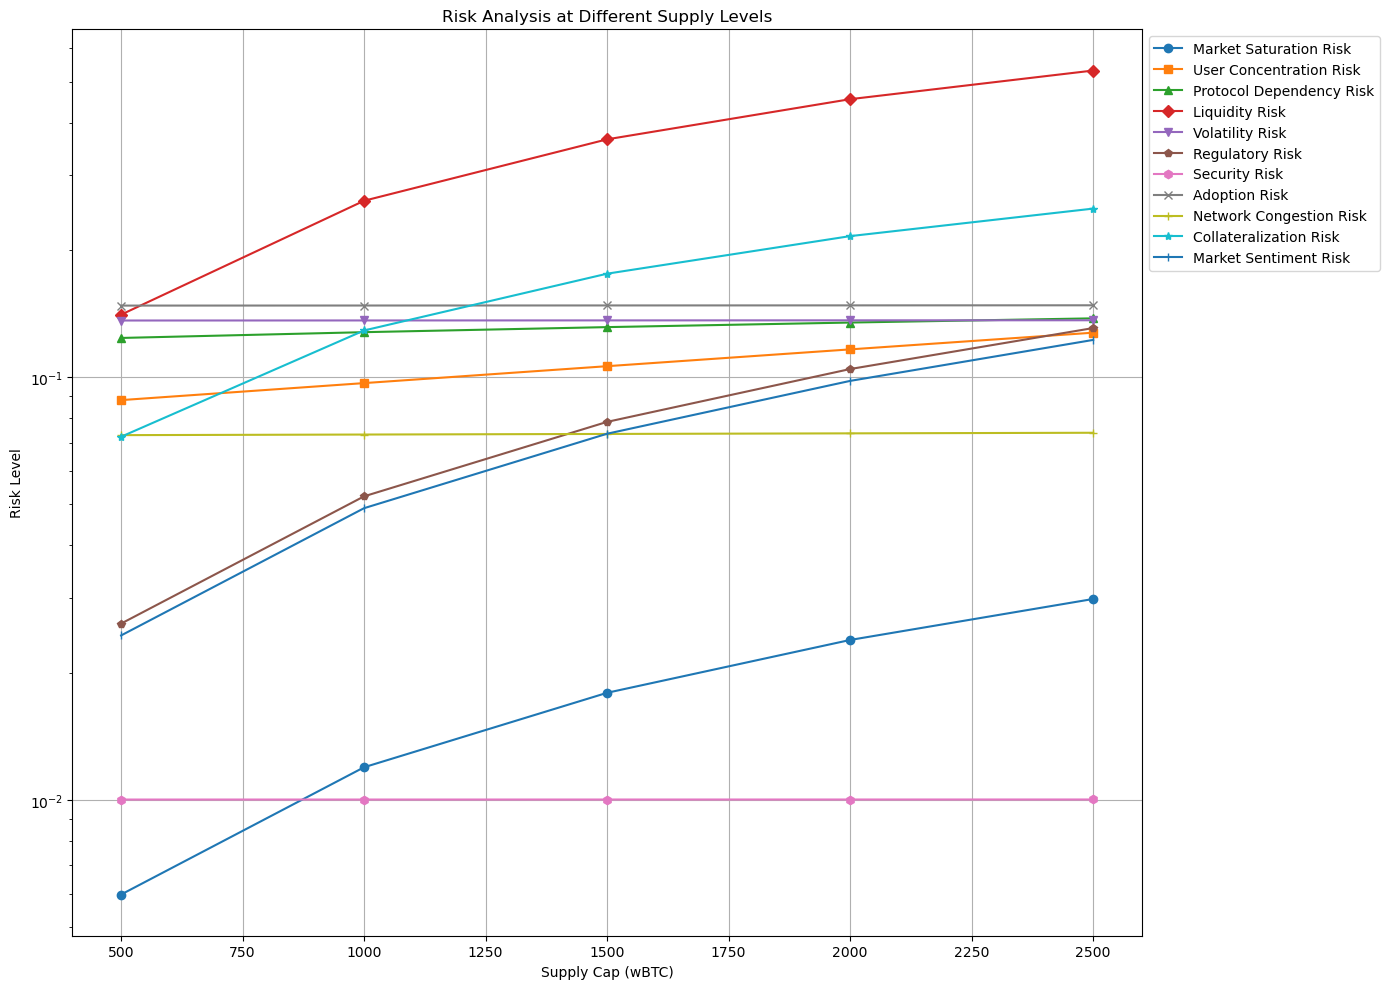

In [678]:
# Plotting
plt.figure(figsize=(14, 10))

plt.plot(supply_caps, market_risks, label='Market Saturation Risk', marker='o')
plt.plot(supply_caps, user_risks, label='User Concentration Risk', marker='s')
plt.plot(supply_caps, protocol_risks, label='Protocol Dependency Risk', marker='^')
plt.plot(supply_caps, liquidity_risks, label='Liquidity Risk', marker='D')
plt.plot(supply_caps, volatility_risks, label='Volatility Risk', marker='v')
plt.plot(supply_caps, regulatory_risks, label='Regulatory Risk', marker='p')
plt.plot(supply_caps, security_risks, label='Security Risk', marker='h')
plt.plot(supply_caps, adoption_risks, label='Adoption Risk', marker='x')
plt.plot(supply_caps, network_risks, label='Network Congestion Risk', marker='+')
plt.plot(supply_caps, collateralization_risks, label='Collateralization Risk', marker='*')
plt.plot(supply_caps, sentiment_risks, label='Market Sentiment Risk', marker='|')

plt.xlabel('Supply Cap (wBTC)')
plt.ylabel('Risk Level')
plt.title('Risk Analysis at Different Supply Levels')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.yscale('log')  # Logarithmic scale for better visualization
plt.tight_layout()
plt.show()
